# Projet MLOps

In [10]:
import pandas as pd

In [11]:
data = pd.read_csv("Loan_Data.csv")
data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [12]:
data.shape

(10000, 8)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [14]:
data.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [15]:
# Supprimer la colonne 'customer_id'
data = data.drop(columns=['customer_id'])

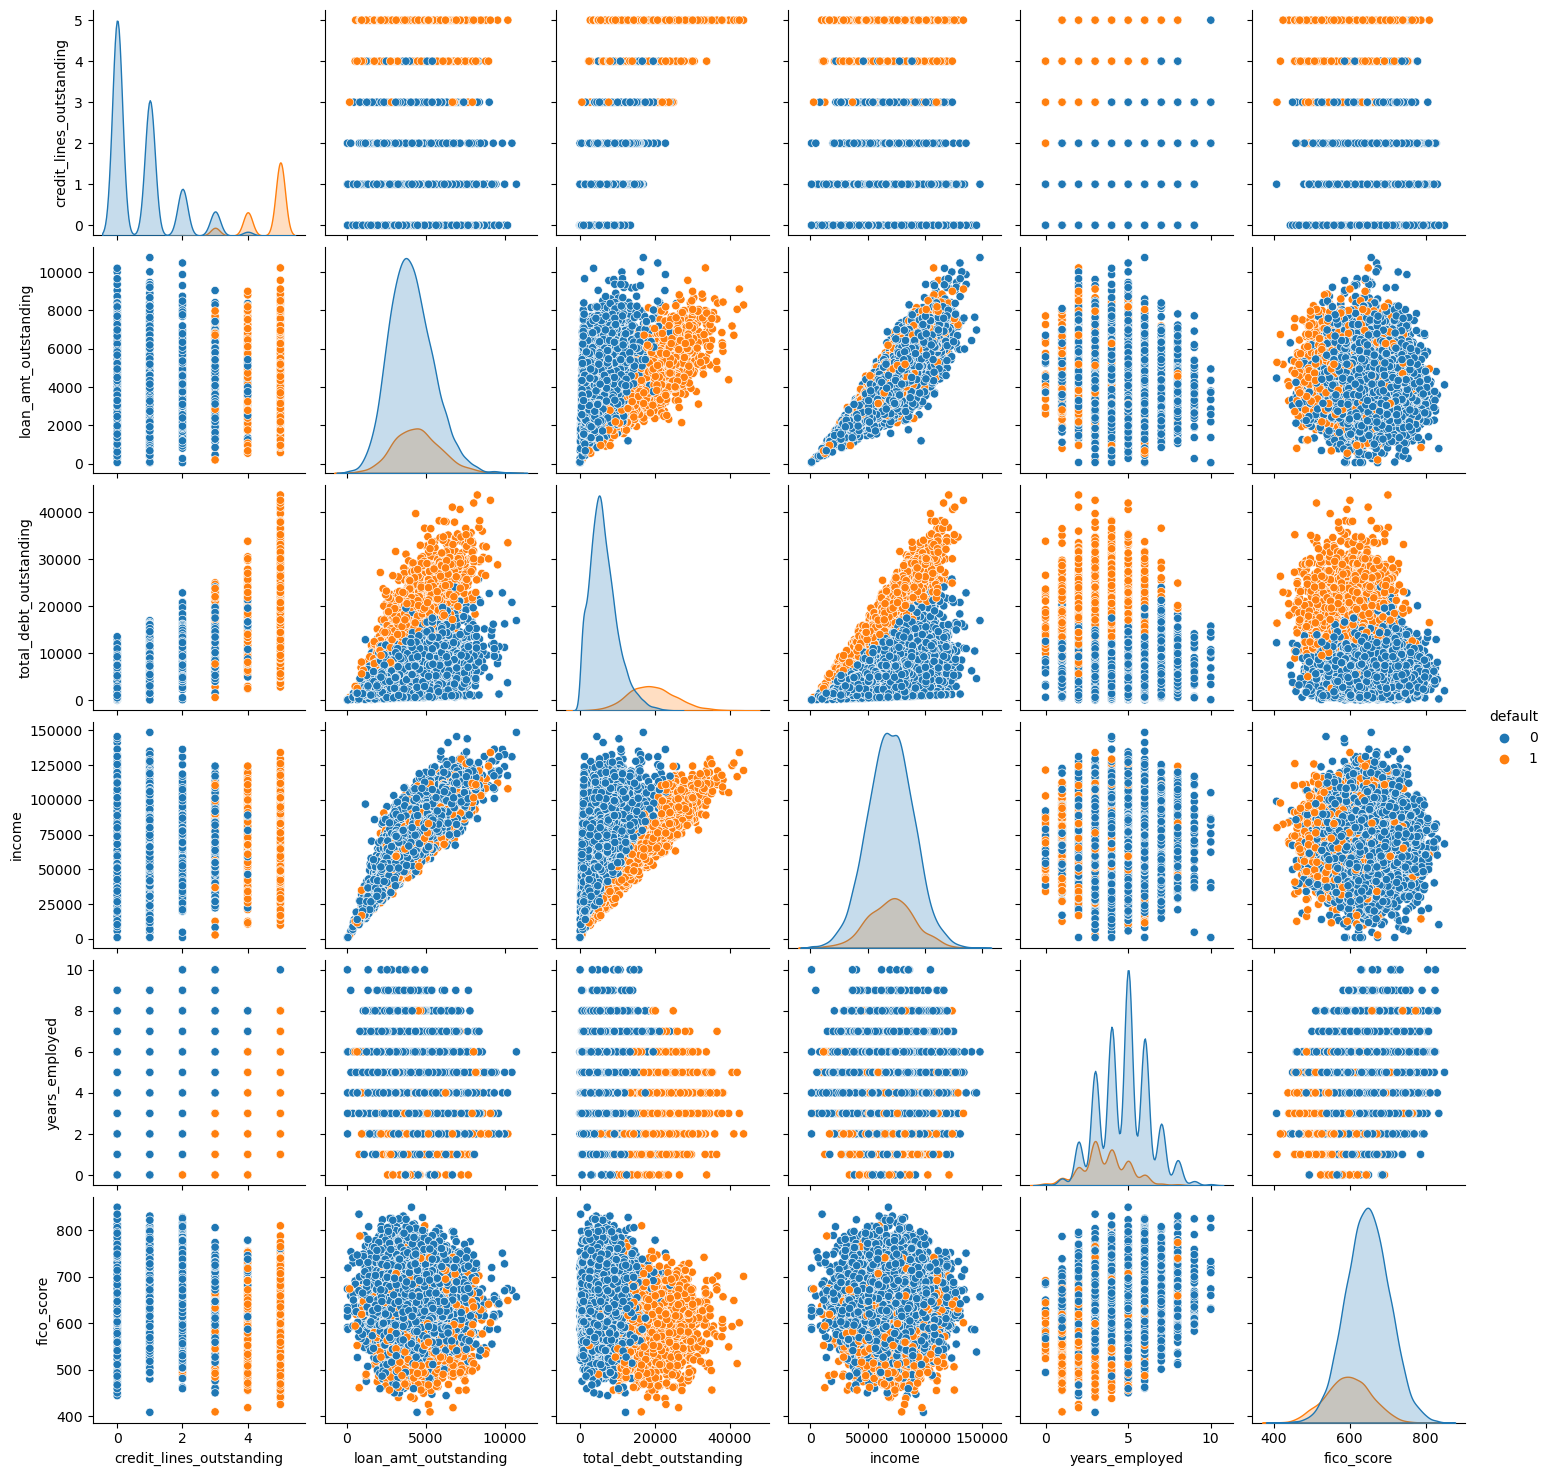

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# Relation des variables avec la variable cible qualitative 'default'

# Tracer les paires plot
sns.pairplot(data, hue='default', diag_kind='kde')

# Afficher le plot
plt.show()

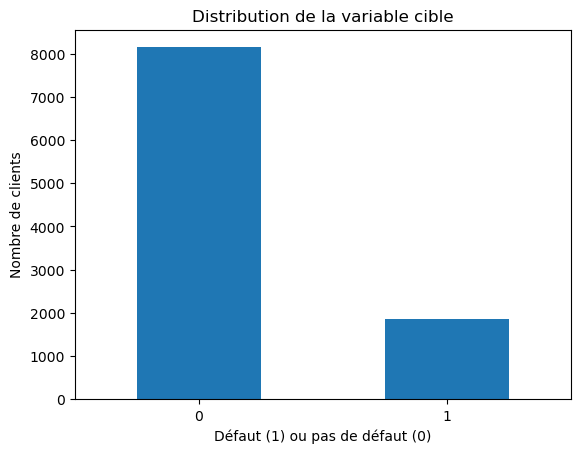

In [17]:
# Diagramme en barres de la variable 'default'
data['default'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible')
plt.xlabel('Défaut (1) ou pas de défaut (0)')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=0)
plt.show()

# Modélisation avec la régression logistique

In [19]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X = data.drop('default', axis=1)  # Variables prédictives
y = data['default']  # Variable cible

# Ajouter une constante pour l'interception
X = sm.add_constant(X)
# Diviser la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Spécification des paramètres dans une cellule séparée
parametres = {
    'method': 'newton',  # Méthode d'optimisation
    'maxiter': 100,      # Nombre maximum d'itérations
    'disp': False        # Affichage des informations d'optimisation
}

In [21]:
# Création et entraînement du modèle de régression logistique
modele = sm.Logit(y_train, X_train)

In [23]:
result = modele.fit(**parametres)

In [24]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7993
Method:                           MLE   Df Model:                            6
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                  0.9983
Time:                        15:17:33   Log-Likelihood:                -6.4342
converged:                       True   LL-Null:                       -3865.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      133.9888     56.035      2.391      0.017      24.162     243.816
credit_lines_outstanding   211.3941     88.462      2.390      0.017      38.011     384.

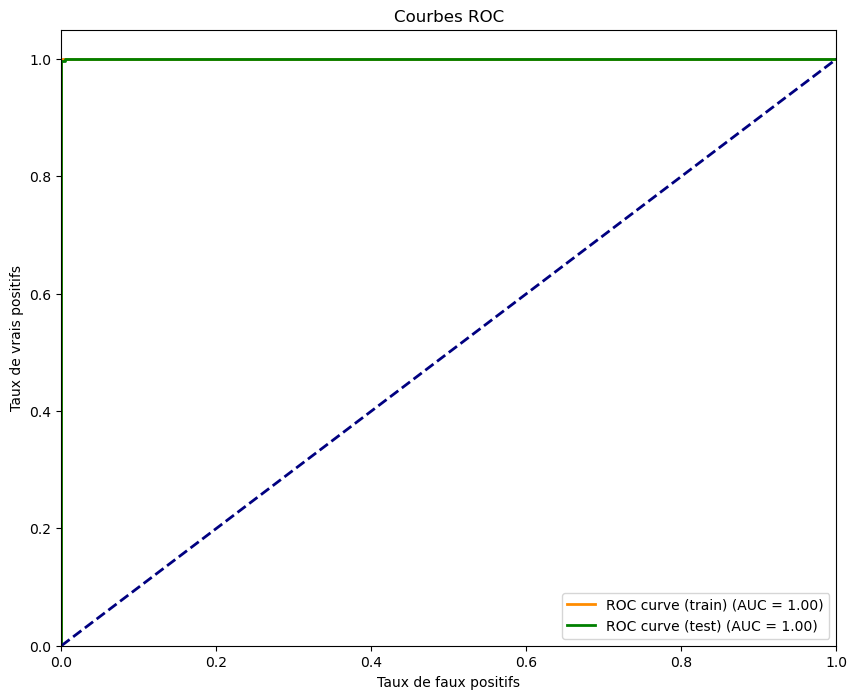

In [25]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       1.00      0.99      0.99       348

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1652    0]
 [   4  344]]


In [28]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_train) > 0.5

# Générer le rapport de classification
report = classification_report(y_train, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6497
           1       1.00      1.00      1.00      1503

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[6495    2]
 [   1 1502]]
